# FFT in numpy

In [255]:
import numpy as np
from matplotlib.pyplot import plot, subplot, figure, xlim
%matplotlib inline

fft = np.fft.fft
fftshift = np.fft.fftshift
ifft = np.fft.ifft
fftfreq = np.fft.fftfreq

parto da un segnale catturato durante 100 s , campionato ogni 10 ms

acquisition time = 100.1 s, sample number = 1001 samp_dt= 0.1 samp_f= 10.0


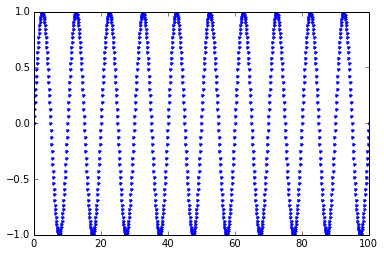

In [281]:
# SIGNAL
period = 10.0 # s (signal frequency)
frequency = 1.0/period
Amp = 1 #amplitude
ac_time = 100.0 # s

# SAMPLING
# il campionamento necessario, secondo il teorema di Shannon, deve essere almeno
# doppio della frequenza massima del segnale
samp_f = 100*frequency
samp_dt = 1/(samp_f) # s (sampling interval)
samp_n =  int(ac_time/samp_dt) + 1 # number of samples
# +1 permette di prendere lo zero del periodo successivo, cosi che il segnale campionato
# è identico dall' inizio alla fine


print "acquisition time =", samp_n*samp_dt,"s,",\
    "sample number =", samp_n,\
    "samp_dt=",samp_dt,\
    "samp_f=",samp_f
    

t = np.arange(samp_n)*samp_dt # array degli istanti in ms
s = Amp*sin( t*2*pi/period ) # segnale

plot(t,s,'.');

la FFT di numpy è questa:
<img src="http://docs.scipy.org/doc/numpy/_images/math/15b77327597f739f3da24c17c641ce8419bb9a4e.png">

la pulsazione è
$$\omega = 2\pi\frac{k}{n}$$
e la frequenza
$$f = \frac{k}{n}$$

la minima frequenza è quella nulla k=0,

la massima corrisponde al minimo periodo distinguibile nel segnale (o da un altro punto di vista alla massima frequenza codificabile con questo numero di campioni)

$$T_{min} = 2T/n = 2dt$$
$$f_{max} = 1/T_{min} = 1/(2dt)$$


[ 0.          0.00999001  0.01998002 ..., -0.02997003 -0.01998002
 -0.00999001]


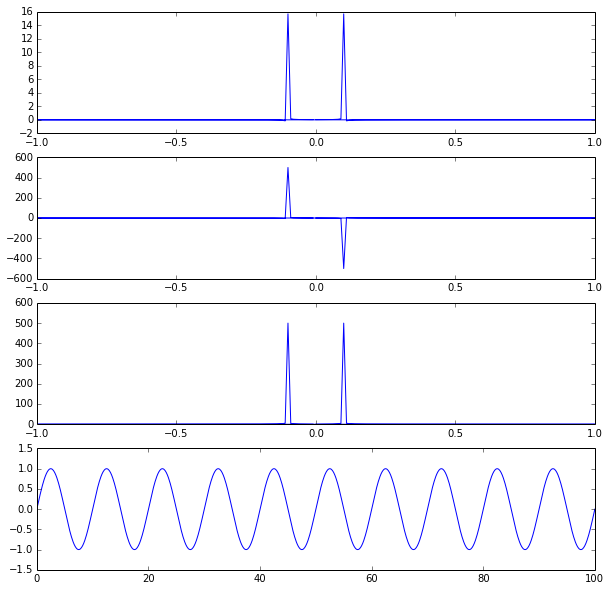

In [292]:
#fmax = 1/(samp_dt*2)
#k = linspace(-fmax,fmax,samp_n)

# lo spazio di fourier puo essere anche calcolato dalla funzione fftfreq
# usando questo, non c'è piu bisogno di fftshift
k = fftfreq(samp_n,samp_dt)


S = fft(s)

plot(S)
plot(k)
print k

figure(figsize=(10,10))

subplot(sps,1,1)
plot(k,real(S))
xlim(-1,1)

subplot(sps,1,2)
plot(k,imag(S));
xlim(-1,1)

subplot(sps,1,3)
plot(k,abs(S))
xlim(-1,1)

subplot(sps,1,4)
plot(t,ifft(S));